**Importing modules and data**

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [ ]:
file = '/content/breast_cancer_survival.csv'

In [ ]:
df = pd.read_csv(file)

df.info()

#quick overview of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 334 non-null    int64  
 1   Gender              334 non-null    object 
 2   Protein1            334 non-null    float64
 3   Protein2            334 non-null    float64
 4   Protein3            334 non-null    float64
 5   Protein4            334 non-null    float64
 6   Tumour_Stage        334 non-null    object 
 7   Histology           334 non-null    object 
 8   ER status           334 non-null    object 
 9   PR status           334 non-null    object 
 10  HER2 status         334 non-null    object 
 11  Surgery_type        334 non-null    object 
 12  Date_of_Surgery     334 non-null    object 
 13  Date_of_Last_Visit  317 non-null    object 
 14  Patient_Status      321 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 39.3+ K

**EDA**

In [ ]:
df.describe()
# Quick view of the datasets statistics 

,Age,Protein1,Protein2,Protein3,Protein4
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,58.886228,-0.029991,0.946896,-0.090204,0.009819
std,12.961212,0.563588,0.911637,0.585175,0.629055
min,29.000000,-2.340900,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.358888,0.362173,-0.513748,-0.377090
50%,58.000000,0.006129,0.992805,-0.173180,0.041768
75%,68.000000,0.343598,1.627900,0.278353,0.425630
max,90.000000,1.593600,3.402200,2.193400,1.629900


In [ ]:
df.head()
# Quick view of the dataset layout and values

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


In [ ]:
print(df['Tumour_Stage'].unique())
print(df['Histology'].unique())
print(df['Surgery_type'].unique())
print(df['ER status'].unique())
print(df['PR status'].unique())
print(df['HER2 status'].unique())

['II' 'I' 'III']
['Infiltrating Ductal Carcinoma' 'Infiltrating Lobular Carcinoma'
 'Mucinous Carcinoma']
['Other' 'Lumpectomy' 'Modified Radical Mastectomy' 'Simple Mastectomy']
['Positive']
['Positive']
['Negative' 'Positive']


In [ ]:
#drop ER and PR status as they contain only 1 value
df.drop(columns=['ER status', 'PR status'], inplace=True)

In [ ]:
"""Removing rows with null values"""

df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 317 non-null    int64  
 1   Gender              317 non-null    object 
 2   Protein1            317 non-null    float64
 3   Protein2            317 non-null    float64
 4   Protein3            317 non-null    float64
 5   Protein4            317 non-null    float64
 6   Tumour_Stage        317 non-null    object 
 7   Histology           317 non-null    object 
 8   HER2 status         317 non-null    object 
 9   Surgery_type        317 non-null    object 
 10  Date_of_Surgery     317 non-null    object 
 11  Date_of_Last_Visit  317 non-null    object 
 12  Patient_Status      317 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 32.3+ KB


**Data visualisation**

Questions to answer:

1.   Most common Tumour Stage ?
2.   Relationship between proteins and survival ?
3.   Relationship between Histology and Protein ?
4.   Most successful surgery types?


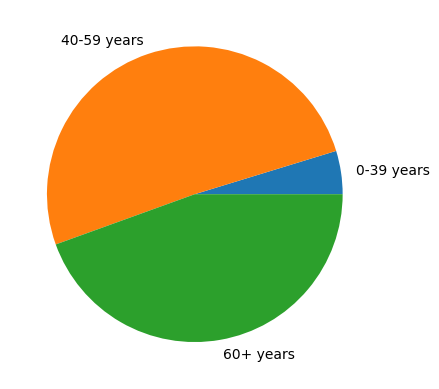

In [ ]:
# Pie chart for different age groups

group_a = df.loc[(df['Age'] < 40)]
group_b = df.loc[(df['Age'] > 39) & (df['Age'] < 60) ]
group_c = df.loc[(df['Age'] > 59)]
                         
pie_data = [len(group_a), len(group_b), len(group_c)]
pie_labels = ["0-39 years", "40-59 years", "60+ years"]    

plt.pie(pie_data, labels=pie_labels)
plt.show()

<Axes: >

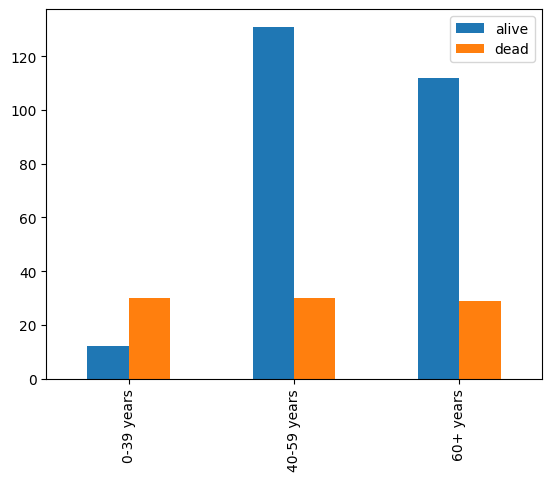

In [ ]:
# Bar charts to see link between age groups and Patient Status

group_a_alive = group_a.loc[(group_a["Patient_Status"] == "Alive")]
group_a_died = group_a.loc[(group_a["Patient_Status"] == "Dead")]
group_b_alive = group_b.loc[(group_b["Patient_Status"] == "Alive")]
group_b_died = group_b.loc[(group_b["Patient_Status"] == "Dead")]
group_c_alive = group_c.loc[(group_c["Patient_Status"] == "Alive")]
group_c_died = group_c.loc[(group_c["Patient_Status"] == "Dead")]

alive = [len(group_a_alive), len(group_b_alive), len(group_c_alive)]
dead = [len(group_b_died), len(group_b_died), len(group_c_died)]
bar_labels = ["0-39 years", "40-59 years", "60+ years"]

df_bar = pd.DataFrame({'alive': alive,
                   'dead': dead}, index=bar_labels)
df_bar.plot.bar()

# Death rate is worse for those under 40 years old

array([<Axes: ylabel='Tumour_Stage'>], dtype=object)

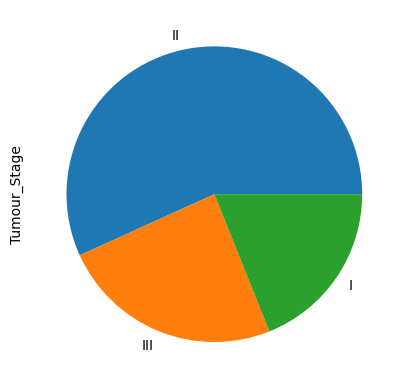

In [ ]:
# Pie chart to see types of tumour and histology 

df["Tumour_Stage"].value_counts().plot.pie()

<Axes: ylabel='Histology'>

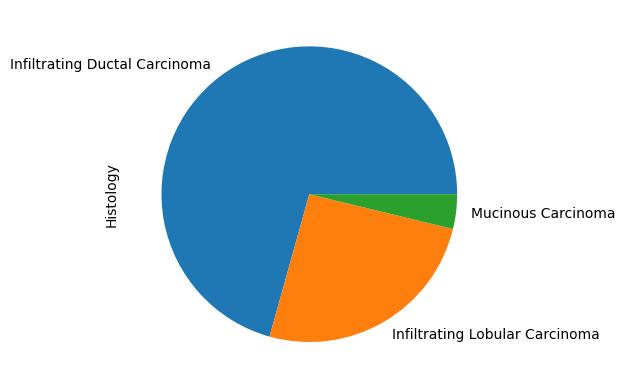

In [ ]:
df["Histology"].value_counts().plot.pie()

In [ ]:
# Here we can see majority of Tumours are stage 2 and the main type is Infiltrating Ductal Carcinoma

In [ ]:
# Scatterplots for Proteins for Dead and Alive using Protein 2,3 & 4 as they are more correlated to Pateint status

df_protein = df[["Protein1", "Protein2", "Protein3", "Protein4", "Patient_Status"]]

#df_alive = df[["Protein1", "Protein2", "Protein3", "Protein4"]].where(df["Patient_Status"] == "Alive")
#df_dead = df[["Protein1", "Protein2", "Protein3", "Protein4"]].where(df["Patient_Status"] == "Dead")

fig = px.scatter_3d(df_protein, x='Protein2', y='Protein3', z='Protein4',
              color='Patient_Status')
fig.show()

In [ ]:
sns.barplot(data=df, x=df.index, y='Protein1', hue='Patient_Status')

In [ ]:
protein_df = df.loc[:, ['Protein1', 'Protein2', 'Protein3', 'Protein4', 'Patient_Status']]
sns.pairplot(protein_df, hue='Patient_Status')

**Data pre-processing**

In [ ]:
#Function to convert string columns to binary

def one_hot_encode(data, column, filter):
  for i in range(len(data)):
    if data[column][i] == filter:
      data[column][i] = 0
    else:
      data[column][i] = 1




In [ ]:
one_hot_encode(df, "Patient_Status", "Alive")

<ipython-input-59-c39513fdc53c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][i] = 0
<ipython-input-59-c39513fdc53c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][i] = 1


In [ ]:
df.corr()

# Columns need to change datatype so we can check correlation and use them in our models

,Age,Protein1,Protein2,Protein3,Protein4
Age,1.000000,-0.044541,-0.011387,-0.047362,0.095417
Protein1,-0.044541,1.000000,0.223093,-0.103046,0.259171
Protein2,-0.011387,0.223093,1.000000,-0.407670,0.084939
Protein3,-0.047362,-0.103046,-0.407670,1.000000,0.076759
Protein4,0.095417,0.259171,0.084939,0.076759,1.000000


In [ ]:
df['Patient_Status'] = df['Patient_Status'].astype(int)

In [ ]:
df.corr()

,Age,Protein1,Protein2,Protein3,Protein4,Patient_Status
Age,1.000000,-0.044541,-0.011387,-0.047362,0.095417,-0.012410
Protein1,-0.044541,1.000000,0.223093,-0.103046,0.259171,-0.019805
Protein2,-0.011387,0.223093,1.000000,-0.407670,0.084939,0.074810
Protein3,-0.047362,-0.103046,-0.407670,1.000000,0.076759,0.025305
Protein4,0.095417,0.259171,0.084939,0.076759,1.000000,0.074876
Patient_Status,-0.012410,-0.019805,0.074810,0.025305,0.074876,1.000000
